---
**<center><h1>Caloriees Burnt Prediction</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This project aims to develop a predictive model for calorie burn estimation, leveraging data science techniques to address a key health and wellness challenge. By analyzing various input features—such as the type of physical activity, its duration, intensity, and individual characteristics like age, weight, and gender—the goal is to accurately predict the number of calories burned during a given activity. This model will serve as a valuable tool for individuals, fitness enthusiasts, and healthcare professionals to optimize calorie management and physical activity planning.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [3]:
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fmendes/fmendesdat263xdemos
!unzip fmendesdat263xdemos.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos
License(s): unknown
100% 296k/296k [00:00<00:00, 627kB/s]
100% 296k/296k [00:00<00:00, 626kB/s]
Archive:  fmendesdat263xdemos.zip
  inflating: calories.csv            
  inflating: exercise.csv            


In [54]:
df = pd.read_csv("exercise.csv").copy()
y = pd.read_csv("calories.csv").copy()

In [55]:
df['Calories'] = y['Calories']

# **Take a look at the data**
---

In [21]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [23]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [24]:
df.select_dtypes(include=['object']).describe()

,Gender
count,15000
unique,2
top,female
freq,7553


In [25]:
df.shape

(15000, 9)

# **Exploratory df Analysis**
---

**Univariate Analysis**

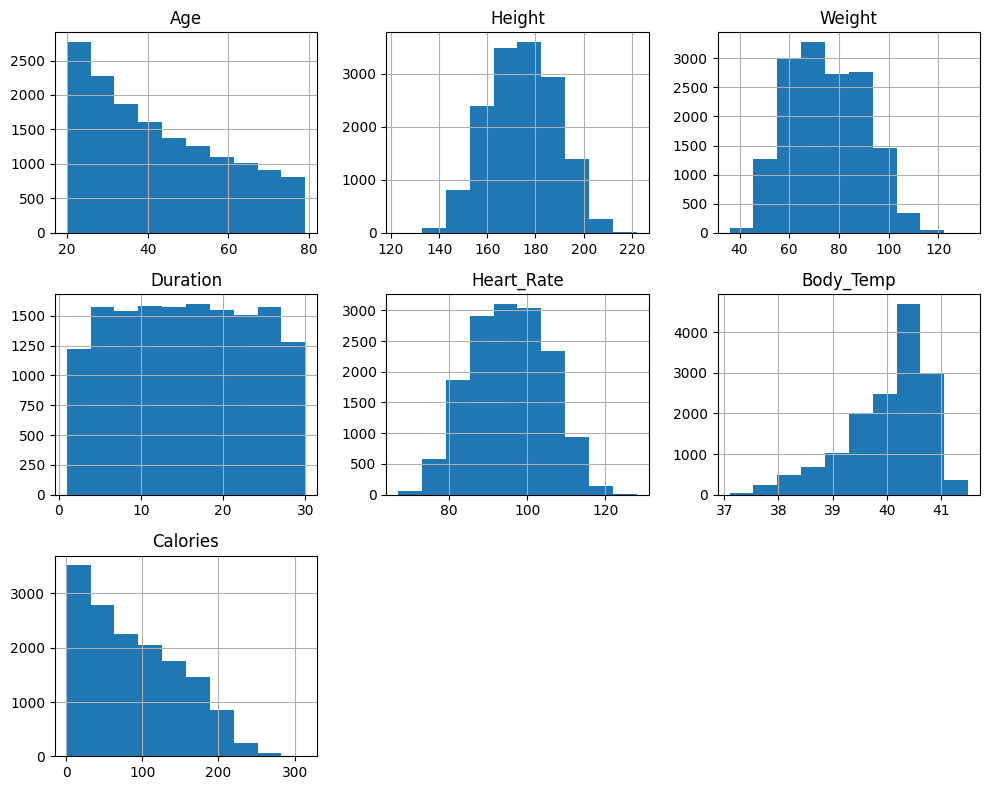

In [26]:
numerical_data = df.select_dtypes(include='number').drop('User_ID',axis=1)

numerical_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

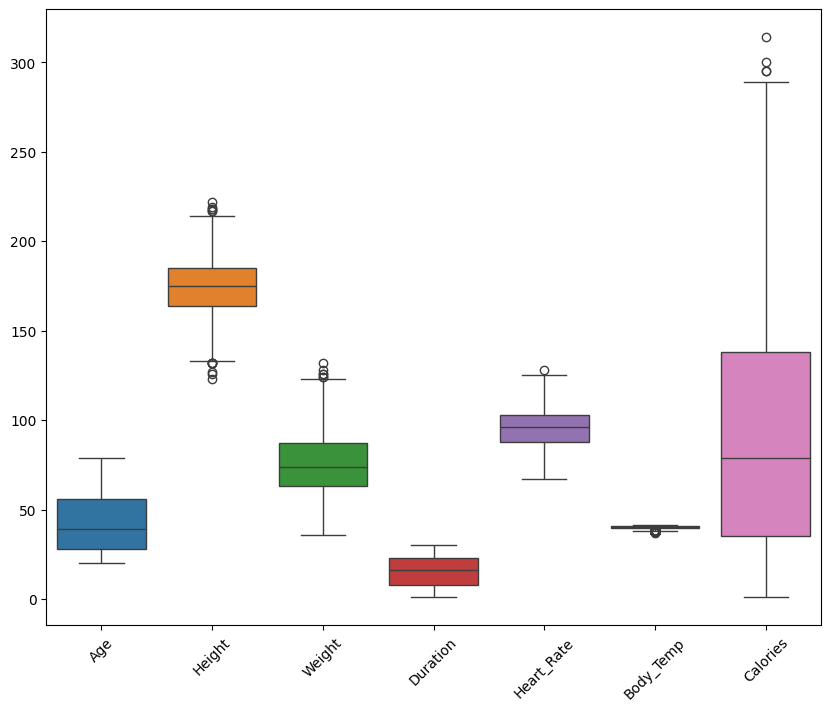

In [27]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.xticks(rotation=45)
plt.show()

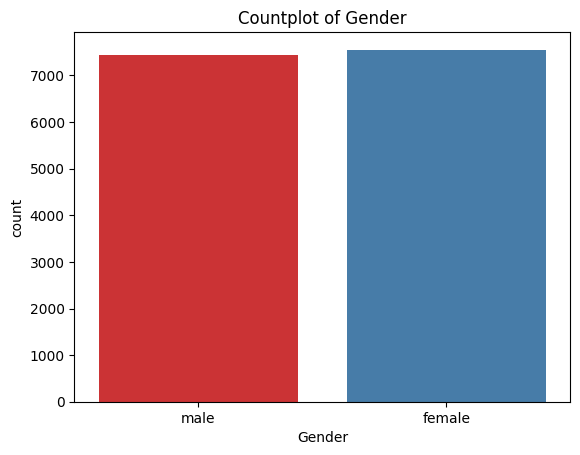

In [28]:
categorical_data = df.select_dtypes(exclude='number')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

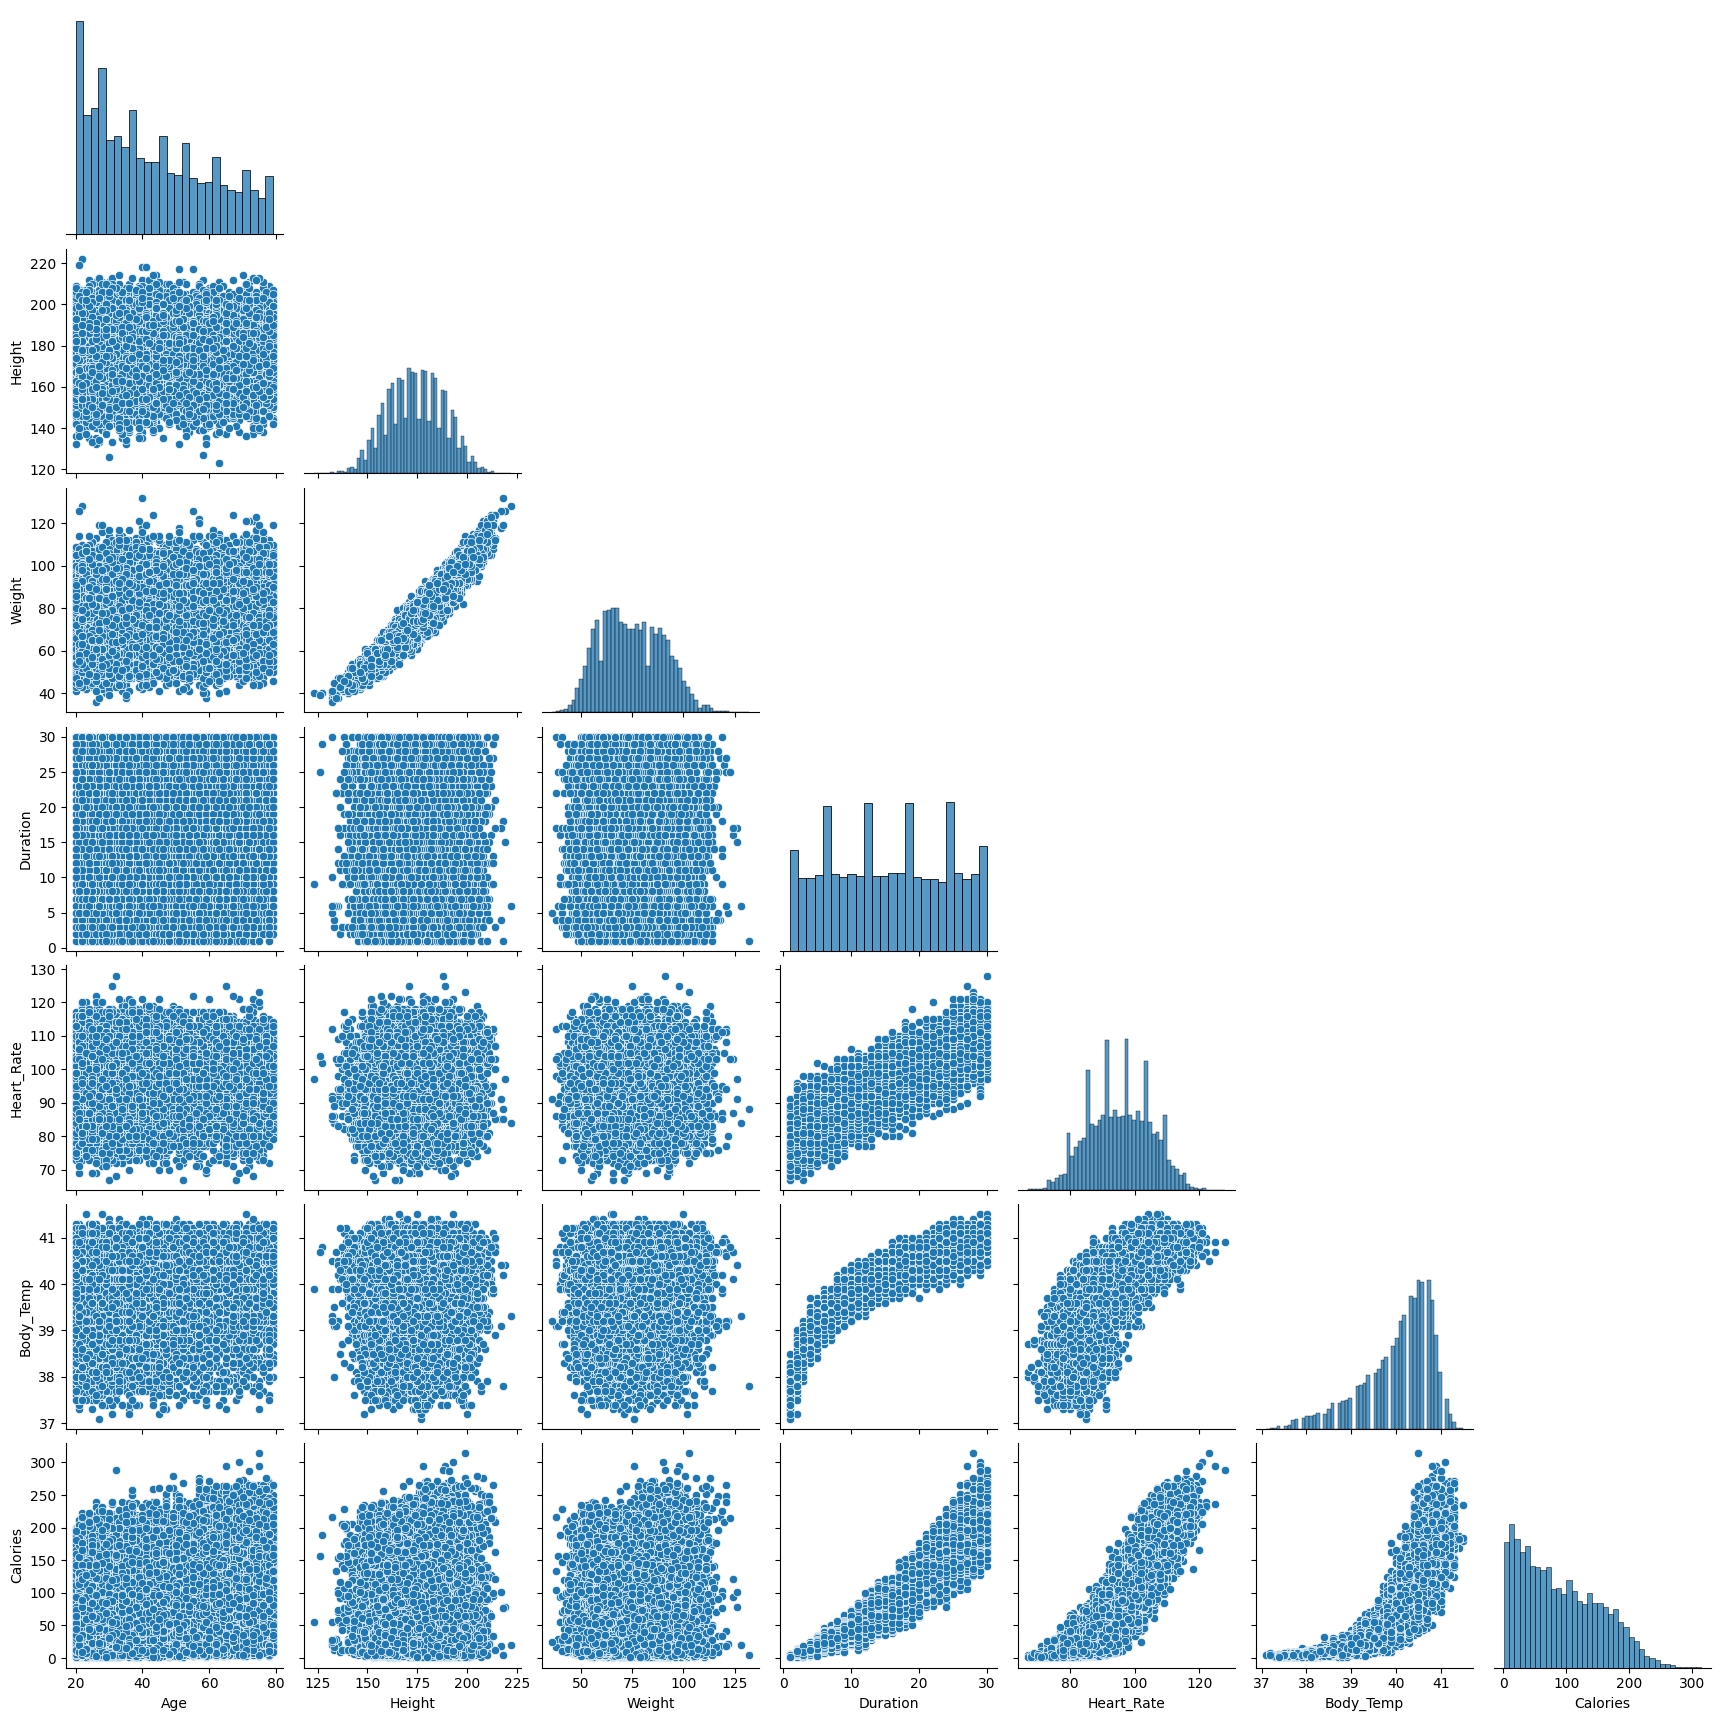

In [29]:
sns.pairplot(numerical_data,corner = True)
plt.show()

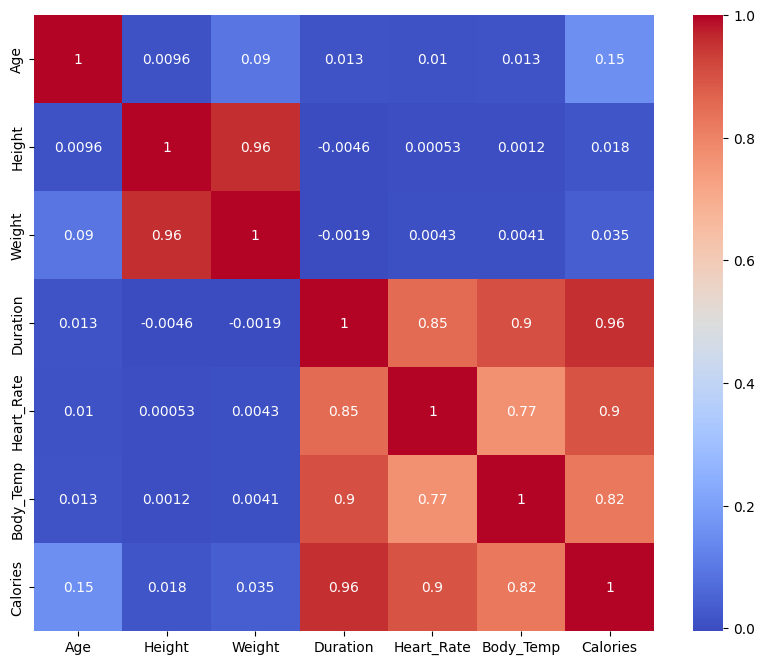

In [30]:
corr = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Drop Unnecessary Columns**

In [56]:
df.drop(['User_ID'], axis=1, inplace=True)

**Handling Duplicate Rows**

In [57]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 1


In [58]:
df.drop_duplicates(inplace=True)

**Handling Missing Data**

In [34]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Gender,0,0.0
Age,0,0.0
Height,0,0.0
Weight,0,0.0
Duration,0,0.0
Heart_Rate,0,0.0
Body_Temp,0,0.0
Calories,0,0.0


In [35]:
total = df.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Encoding Categorical Variables**

In [59]:
df['Gender'].value_counts()

,count
Gender,
female,7552
male,7447


In [60]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

**Skew**

In [61]:
df = np.log1p(df)

**Data splitting**

In [62]:
X = df.drop(['Calories'], axis=1)
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=44)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=.5,random_state=44)

**Data Normalization**

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# **Modeling**
-----

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as XGB

In [67]:
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('XGBRegressor',XGB.XGBRegressor(random_state=42))
]

In [68]:
for reg_name, reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    cv_scores = cross_val_score(reg, X_train, y_train, cv=5)
    print(f'{reg_name}:')
    print("Cross Val Score: ", cv_scores.mean())
    print('R2 Score: ', r2_score(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print('------------------------------------')

Linear Regression:
Cross Val Score:  0.9886670099158936
R2 Score:  0.9870656977307712
MSE:  0.01175363601807205
MAE:  0.07607492887168042
------------------------------------
Ridge Regression:
Cross Val Score:  0.9886669304933156
R2 Score:  0.9870651800720065
MSE:  0.011754106424018633
MAE:  0.07607211808797627
------------------------------------
Decision Tree Regressor:
Cross Val Score:  0.9935974876220378
R2 Score:  0.9946913644152218
MSE:  0.004824053831222948
MAE:  0.045374844213185384
------------------------------------
Random Forest Regressor:
Cross Val Score:  0.9976771909120357
R2 Score:  0.9981049313370067
MSE:  0.0017220834050761446
MAE:  0.025436297753114363
------------------------------------
K-Nearest Neighbors Regressor:
Cross Val Score:  0.9907396556142775
R2 Score:  0.9914440197986093
MSE:  0.007774975021592205
MAE:  0.06535299463735648
------------------------------------
Gradient Boosting Regressor:
Cross Val Score:  0.9979081935046571
R2 Score:  0.9978169613070775

# **DNN**
-----

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.metrics import R2Score

In [70]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [71]:
ES = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [72]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[R2Score])

In [73]:
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val), callbacks=[ES,RL])

Epoch 1/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.8381 - r2_score: -6.5958 - val_loss: 0.3790 - val_r2_score: 0.5917 - learning_rate: 0.0010
Epoch 2/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2970 - r2_score: 0.6775 - val_loss: 0.0815 - val_r2_score: 0.9121 - learning_rate: 0.0010
Epoch 3/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0645 - r2_score: 0.9285 - val_loss: 0.0244 - val_r2_score: 0.9737 - learning_rate: 0.0010
Epoch 4/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0206 - r2_score: 0.9773 - val_loss: 0.0121 - val_r2_score: 0.9869 - learning_rate: 0.0010
Epoch 5/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - r2_score: 0.9883 - val_loss: 0.0081 - val_r2_score: 0.9913 - learning_rate: 0.0010
Epoch 6/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0077 - r2_score: 0.9916 - val_loss: 0.0062 - val_r2_score: 0.9933 - learning_rate: 0.0010
Epoch 7/150
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054 - r2_score: 0

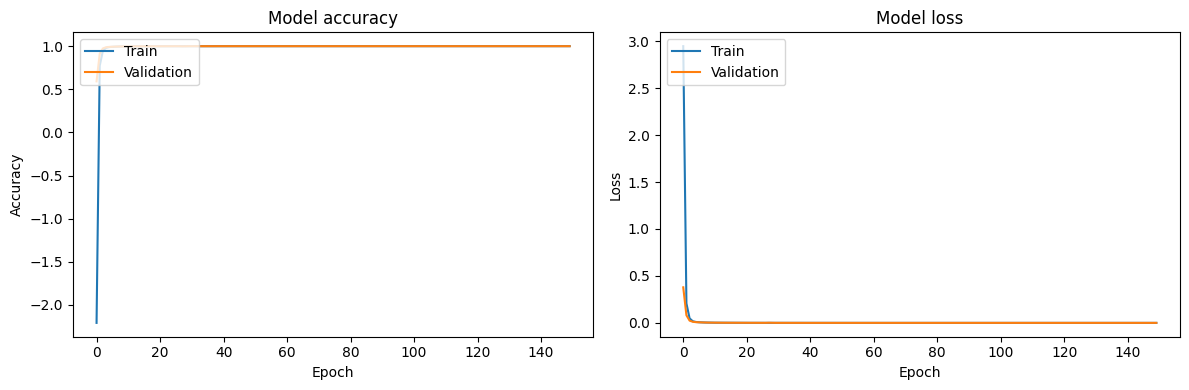

In [74]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [75]:
model.evaluate(X_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2951e-04 - r2_score: 0.9995


[0.0004432937712408602, 0.9995121955871582]